## Homework 2: Wine Quality Prediction Using SGD
### Student Name: Graeme Holliday
### Department: Computer Science
### Course: CS 474/574: Deep Learning/2020 Fall
### Due: 09/25/2020


Description: In this homework, you are going to implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.

2. SGD implementation. 35 pts
    - Shuffle data (X and Y) at the beginning of each epoch. (10 pts)
    - update w using minibatches correctly. (10 pts)
    - record the loss and w at the end of each epoch. (10 pts)
    - Decay learning rate at the end of each epoch. (5 points)
    
3. Evaluation (cross-validation). 65 pts
    - Split the dataset into training (70%) and test (30%) sets. (10 points)
    - Calculate and print out the MSE and MAE of GD for the training and test sets, respectively. (20 points)
        - Print formate: 
            The training MSE is: , the traing MAE is: .
            The test MSE is: , the test MAE is: .               
    - Calculate and print out the MSE and MAE of SGD for the training and test sets, respectively. (20 points)
         - Print formate: 
            The training MSE is: , the traing MAE is: .
            The test MSE is: , the test MAE is: . 
            
    - Plot the loss curve for SGD. (5 points)
        - tip: using the 'plot' function in matplotlib
        
    - Plot the mse curves on the training and test sets, respectively, over the weight sequence (w_hist). (10 points)

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df = pd.read_csv('winequality-white.csv', sep = ';')
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = np.sum(np.square(Y - Y_hat)) / 2
    
    return loss

# Optimization 1: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w) - b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        loss_hist[i] = loss_w
        
        w = w - lr * gradient
        gradient = A.T.dot(np.dot(A, w) - b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


In [45]:
# shuffle two arrays while maintaining their relation to each other.
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [46]:
# create separate training and test data sets
def train_test_split(X, Y, train_size, shuffle=True):
    if shuffle:
        x, y = shuffle_in_unison(X, Y)
    
    # split
    x_train = x[:train_size]
    y_train = y[:train_size]
    x_test = x[train_size:]
    y_test = y[train_size:]
    
    return x_train, y_train, x_test, y_test

In [51]:
def mae(x, x_hat):
    assert len(x) == len(x_hat)
    n = len(x)
    total = 0
    for i in range(n):
        total += abs(x[i] - x_hat[i])
    return total / n

def mse(x, x_hat):
    assert len(x) == len(x_hat)
    n = len(x)
    total = 0
    for i in range(n):
        total += (x[i] - x_hat[i]) ** 2
    return total / n

In [47]:
# Optimization 2: implement the minibatch Gradient Descent approach
def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100, decay = 0.01):
    '''
    X: training data
    Y: training target
    lr: learning rate
    batch_size: batch size
    epoch: number of max epoches
    
    return: w_star, loss_hist, w_hist
    '''
    
    m = len(Y)
    w = np.random.rand(X.shape[1] + 1, 1)
    loss_hist = np.zeros(epoch) # loss history
    w_hist = np.zeros((epoch, w.shape[0])) # w history

    # Add your code here
    #------------------------
    for i in range(epoch):
        x, y = shuffle_in_unison(X, Y)
        
        # break data into minibatches
        x_batches = np.array_split(x, int(m / batch_size))
        y_batches = np.array_split(y, int(m / batch_size))
        
        # iterate over batches
        for j in range(len(y_batches)):
            # format batch data
            x_j = x_batches[j]
            y_j = y_batches[j]
            x_j = np.c_[np.ones((y_j.shape[0])), x_j]
            y_j = np.expand_dims(y_j, -1)
            
            # update w
            grad = x_j.T.dot(np.dot(x_j, w) - y_j)
            w = w - lr * grad / len(y_batches)

        lr /= 1 + decay * i # simple lr decay
        loss_w = loss(w, X, Y)
        loss_hist[i] = loss_w
        w_hist[i, :] = w.T
    #--------------------------
    
    w_star = w
    return w_star, loss_hist, w_hist

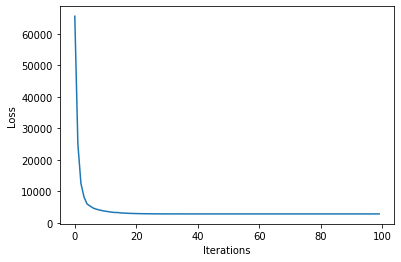

train mse 1.6559721195283998, train mae 0.9969209879055252
test mse 1.6127117486175904, test mae 1.000953438181885


In [58]:
# use 70% of data for training
x_train, y_train, x_test, y_test = train_test_split(X, Y, int(0.7 * Y.shape[0]))

# run SGD to find w_star
epochs = 100
# the lr hyperparameter is very sensitive, values an order of magnitude greater than 1e-4 will NOT work!
w_star_sgd, loss_hist_sgd, w_hist_sgd = SGD(x_train, y_train, lr=1e-4, epoch=epochs, decay=0.01)

y_train_hat = predict(x_train, w_star_sgd)
y_test_hat = predict(x_test, w_star_sgd)
# compare those MSEs and MAEs, print them

# show the Loss curve
plt.plot(range(epochs), loss_hist_sgd)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

train_mse_sgd = mse(y_train, y_train_hat)
train_mae_sgd = mae(y_train, y_train_hat)
test_mse_sgd = mse(y_test, y_test_hat)
test_mae_sgd = mae(y_test, y_test_hat)
print('train mse {}, train mae {}'.format(train_mse_sgd, train_mae_sgd))
print('test mse {}, test mae {}'.format(test_mse_sgd, test_mae_sgd))

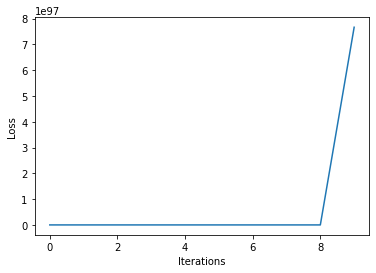

train mse 3.8292822175458855e+104, train mae 1.870240216662531e+52
test mse 3.747897525109456e+104, test mae 1.855542285984217e+52


In [59]:
# Example
w_star, loss_hist, w_hist = GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 10)

y_train_hat = predict(x_train, w_star)
y_test_hat = predict(x_test, w_star)

# show the Loss curve
plt.plot(range(10), loss_hist)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

train_mse = mse(y_train, y_train_hat)
train_mae = mae(y_train, y_train_hat)
test_mse = mse(y_test, y_test_hat)
test_mae = mae(y_test, y_test_hat)
print('train mse {}, train mae {}'.format(train_mse, train_mae))
print('test mse {}, test mae {}'.format(test_mse, test_mae))

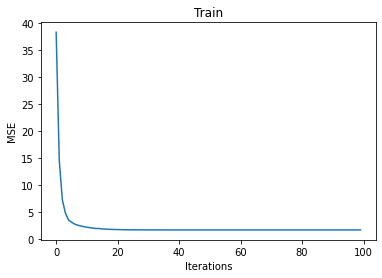

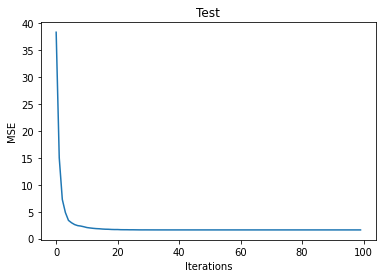

In [62]:
# train
train_mses = []
for w in w_hist_sgd:
    y_train_hat = predict(x_train, w)
    train_mses.append(mse(y_train, y_train_hat))
plt.plot(range(len(train_mses)), train_mses)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Train')
plt.show()
    
# test
test_mses = []
for w in w_hist_sgd:
    y_test_hat = predict(x_test, w)
    test_mses.append(mse(y_test, y_test_hat))
plt.plot(range(len(test_mses)), test_mses)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Test')
plt.show()